# Data Wrangling:
### Introduction:
The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
### Steps followed are:
1. Gathering data
2. Assessing data
3. Cleaning data
Further analyzation and visualizations are done on cleaned data.

### Gathering:

In [1]:
# importing necessary libraries:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
import warnings

Twitter Archive file

In [2]:
# loading the enhanced twitter archive file we were given:
twitter_1 = pd.read_csv('twitter-archive-enhanced.csv')

Twitter Image prediction

In [3]:
# Scrapping the image predictions file:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as f:
    f.write(response.content)

#Reading TSV file
image = pd.read_csv('image-predictions.tsv', sep='\t' )

Twitter API from Json

##  I haven't received authoraization from twitter so Udacity mentor provided me tweet_json.txt file and told me to put this in notebook.
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
### These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

### Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
 #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# Read the json of txt and put it into list
with open('tweet-json.txt', mode='r') as file:
    data = [json.loads(line) for line in file]
# Encode data into a json string and convert it to a dataframe
df =pd.read_json(json.dumps(data))

In [5]:
# necessary columns for futher analyzation:
tweet_final = df[['id', 'retweet_count', 'favorite_count','created_at']]
 
tweet_final.sample(5)

,id,retweet_count,favorite_count,created_at
256,843856843873095681,5220,23211,2017-03-20 16:08:44+00:00
2091,670780561024270336,317,831,2015-11-29 01:45:22+00:00
1061,741067306818797568,3520,10342,2016-06-10 00:39:48+00:00
1652,683449695444799489,1837,4290,2016-01-03 00:47:59+00:00
706,785515384317313025,1477,6800,2016-10-10 16:20:36+00:00


### Creating copy of data files for further cleaning and assessment:

In [6]:
twitter_clean = twitter_1.copy()

In [7]:
image_clean = image.copy()

In [8]:
tweet_json_clean = tweet_final.copy()

## Assessing data:

### Visual Assessment:

In [9]:
# getting overview of dataset
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
# getting overview of data
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
# getting overview of dataset:
tweet_json_clean

,id,retweet_count,favorite_count,created_at
0,892420643555336193,8853,39467,2017-08-01 16:23:56+00:00
1,892177421306343426,6514,33819,2017-08-01 00:17:27+00:00
2,891815181378084864,4328,25461,2017-07-31 00:18:03+00:00
3,891689557279858688,8964,42908,2017-07-30 15:58:51+00:00
4,891327558926688256,9774,41048,2017-07-29 16:00:24+00:00
...,...,...,...,...
2349,666049248165822465,41,111,2015-11-16 00:24:50+00:00
2350,666044226329800704,147,311,2015-11-16 00:04:52+00:00
2351,666033412701032449,47,128,2015-11-15 23:21:54+00:00
2352,666029285002620928,48,132,2015-11-15 23:05:30+00:00


## Programmatic Assessment:

In [12]:
twitter_clean.shape

(2356, 17)

In [13]:
# Basic information about dataset:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Basic statistics of dataset:
twitter_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# duplicated values in data:
sum(twitter_clean.duplicated())

0

In [16]:
# null values in dataset
twitter_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
#Checking the rating values for numerator:
twitter_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
#Checking the rating values for denominator: 
twitter_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
image_clean.shape

(2075, 12)

In [20]:
# Basic information about data
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# Statistics of data:
image_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# Checking duplicate url:
sum(image_clean.jpg_url.duplicated())

66

In [23]:
tweet_json_clean.shape

(2354, 4)

In [24]:
# Basic information of dataset:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.7 KB


In [25]:
# Statistics od dataset:
tweet_json_clean.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [26]:
#Checking missing values
tweet_json_clean.isnull().sum()

id                0
retweet_count     0
favorite_count    0
created_at        0
dtype: int64

In [27]:
#Checking for duplicates
sum(tweet_json_clean.duplicated())

0

## Quality issues:
1. Removing Retweets from the dataset
2. Converting tweet_id and name into proper datatypes as string.
3. Removing columns that are not necessary for the process:'in_reply_to_status_id'and 'in_reply_to_user_id'
4. Timestamp should be datetime instead of object(string).
5. Converting tweet_id and name into proper datatypes as string.
6. Converting source and dog_stage as categorical data types for analysis.
7. Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and many are present as seen visually as well as programmaticaaly, Further added an additional column of final_rating.
8. Drop duplicate jpg_url present in the dataset
9. name has values that are the string "None" instead of NaN.Some names are inaccurate such as "a", "an", "the", "very", "by". Looking visually, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old.
10. Converting p1,p2,p3 into lowercase as we can see some unnecessary Captiliased forms of data in it. 

## Tidiness:
Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

#### 1. Merge all dataframes: tweet_json_clean and image_clean data should be combined with the twitter_clean data since they are information about the same tweet.
#### 2. Convert the dog stage or category into one column instead of the multiple columns


## Cleaning Data:

### Tidiness:

### Define:

Merge all dataframes:
tweet_json_clean and image_clean data should be combined with the twitter_clean data since they are information about the same tweet.
##### Solution: Merge the 3 datasets together on 'tweet_id' using the merge function.


### Code:

In [28]:
final_clean = pd.merge(twitter_clean, image_clean, how = 'inner', on = 'tweet_id')

In [29]:
# renaming id column for merging dataset:
tweet_json_clean.rename(columns ={'id': 'tweet_id'}, inplace =True)

In [30]:
# Final merged dataset
final_clean = pd.merge(final_clean, tweet_json_clean, how = 'inner', on = 'tweet_id')

### Test:

In [31]:
# few rows of the new merged dataset
final_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,2017-08-01 16:23:56+00:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,2017-08-01 00:17:27+00:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,2017-07-31 00:18:03+00:00


In [32]:
# Basic information regarding dataset:
final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
jpg_url                       2073 

In [33]:
# Number of rows and columns in the dataset:
final_clean.shape

(2073, 31)

In [34]:
# Statistics of the dataset:
final_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.073000e+03,2.300000e+01,2.300000e+01,7.900000e+01,7.900000e+01,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000
mean,7.383634e+17,6.978112e+17,4.196984e+09,7.663364e+17,9.967874e+15,12.265798,10.511819,1.203570,0.594532,1.346665e-01,6.034005e-02,2976.089243,8556.718283
std,6.780118e+16,4.359384e+16,0.000000e+00,5.882530e+16,8.859637e+16,40.699924,7.180517,0.561856,0.271234,1.006830e-01,5.092769e-02,5054.897526,12098.640994
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,6.764706e+17,6.732411e+17,4.196984e+09,7.124037e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,634.000000,1674.000000
50%,7.119681e+17,6.757073e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,1408.000000,3864.000000
75%,7.931959e+17,7.031489e+17,4.196984e+09,8.068680e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,3443.000000,10937.000000
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Tidiness:

### Define:

Convert the dog stage or category into one column instead of the multiple columns like doggo, floofer, pupper and puppo and combining them into one Dog_Stage column. 

### Code:

In [35]:
final_clean.loc[final_clean.doggo == 'None', 'doggo'] = ''
final_clean.loc[final_clean.floofer == 'None', 'floofer'] = ''
final_clean.loc[final_clean.pupper == 'None', 'pupper'] = ''
final_clean.loc[final_clean.puppo == 'None', 'puppo'] = ''

final_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size()

doggo  floofer  pupper  puppo
                                 1753
                        puppo      23
                pupper            210
       floofer                      7
doggo                              67
                        puppo       1
                pupper             11
       floofer                      1
dtype: int64

The answer used for doing the process :
https://knowledge.udacity.com/questions/30062

In [36]:
## create new colum dog_stage for doggo, floofer, pupper and puppo
final_clean['dog_stage'] = final_clean.doggo + final_clean.floofer + final_clean.pupper + final_clean.puppo
final_clean.loc[final_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
final_clean.loc[final_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
final_clean.loc[final_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

final_clean.loc[final_clean.dog_stage == '', 'dog_stage'] = 'None'

In [37]:
# dropping unnecessary columns:
final_clean.drop(['doggo','floofer','pupper','puppo'],axis =1 ,inplace = True)

### Test:

In [38]:
# checking count of dog stage:
final_clean['dog_stage'].value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

## Quality:

### Define:

Removing Retweets from the dataset

In [39]:
## Keep columns where 'retweeted_status_id' is NaN
final_clean = final_clean[np.isnan(final_clean.retweeted_status_id)]


In [40]:
#Remove 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns
final_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

### Test:

In [41]:
# Checking for columns being removed:
final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf                  19

### Define:

Removing columns that are not necessary for the process:'in_reply_to_status_id'and  'in_reply_to_user_id'

### Code:

In [42]:
final_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

### Test:

In [43]:
# Checking for removed columns:
final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64

### Define:

Timestamp should be datetime instead of object(string).

### Code:

In [44]:
final_clean['timestamp'] = pd.to_datetime(final_clean['timestamp'])

### Test:

In [45]:
# Checking data type of timestamp:
final_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
created_at            datetime64[ns, UTC]
dog_stage                          object
dtype: object

### Define:

Converting tweet_id and name into proper datatypes as string.

### Code:

In [46]:
final_clean['tweet_id'] = final_clean['tweet_id'].astype(str)

In [47]:
final_clean['name'] = final_clean['name'].astype(str)

### Test:

In [48]:
# Checking data type
final_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
created_at            datetime64[ns, UTC]
dog_stage                          object
dtype: object

### Define:

Converting source and dog_stage as categorical data types for analysis.

### Code:

In [49]:
final_clean['source'] = final_clean['source'].astype('category')

In [50]:
final_clean['dog_stage'] = final_clean['dog_stage'].astype('category')

### Test:

In [51]:
#  Checking data type:
final_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
jpg_url                            object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
created_at            datetime64[ns, UTC]
dog_stage                        category
dtype: object

### Define:

Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and many are present as seen visually as well as programmaticaaly.
Reference : https://knowledge.udacity.com/questions/48718 as well as the reviewer also sugggested the same.
I have found all incorrect numerators and replaced them with correct values.

### Code:

In [52]:
# Tweets with decimals:
final_clean[final_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,dog_stage
40,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,...,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,10407,46860,2017-07-08 00:28:19+00:00,None
558,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,...,Persian_cat,0.122978,False,chow,0.102654,True,7069,20296,2016-10-13 23:23:56+00:00,None
614,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,...,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1885,7320,2016-09-20 00:24:34+00:00,pupper
1451,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,...,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,542,1879,2015-12-25 21:06:00+00:00,None


In [53]:
# Correcting them with values:
final_clean.loc[(final_clean['tweet_id'] == 883482846933004288) & (final_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
final_clean.loc[(final_clean['tweet_id'] == 786709082849828864) & (final_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
final_clean.loc[(final_clean['tweet_id'] == 778027034220126208) & (final_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
final_clean.loc[(final_clean['tweet_id'] == 680494726643068929) & (final_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

In [54]:
## Converting to float
final_clean[['rating_numerator', 'rating_denominator']] = final_clean[['rating_numerator','rating_denominator']].astype(float)


In [55]:
## Adding final rating as a column for anaylsis:
final_clean['final_rating'] =  final_clean['rating_numerator'] / final_clean['rating_denominator'].astype(float)


### Test:

In [56]:
# Checking additional column added
final_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,dog_stage,final_rating
2017,667062181243039745,2015-11-18 19:29:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,https://twitter.com/dog_rates/status/667062181...,10.0,10.0,Keet,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,...,0.090998,True,kelpie,0.022956,True,57,227,2015-11-18 19:29:52+00:00,None,1.0
807,749317047558017024,2016-07-02 19:01:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,12.0,10.0,Blu,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,...,0.108382,True,buckeye,0.074617,False,2509,6076,2016-07-02 19:01:20+00:00,floofer,1.2
659,771014301343748096,2016-08-31 15:58:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,7.0,10.0,None,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,...,0.111790,False,macaque,0.088925,False,1782,7032,2016-08-31 15:58:28+00:00,None,0.7
1016,714606013974974464,2016-03-29 00:12:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,https://twitter.com/dog_rates/status/714606013...,12.0,10.0,None,https://pbs.twimg.com/media/CerKYG8WAAM1aE-.jpg,1,...,0.256198,True,golden_retriever,0.129643,True,1038,3938,2016-03-29 00:12:05+00:00,None,1.2
279,831309418084069378,2017-02-14 01:09:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,https://twitter.com/dog_rates/status/831309418...,12.0,10.0,Scooter,https://pbs.twimg.com/media/C4lngK5VUAEVrNO.jpg,1,...,0.132449,True,Labrador_retriever,0.074727,True,2786,12819,2017-02-14 01:09:44+00:00,None,1.2


### Define:

Drop duplicate jpg_url present in the dataset.

### Code:

In [57]:
final_clean = final_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test:

In [58]:
sum(final_clean.jpg_url.duplicated())

0

### Define:

name has values that are the string "None" instead of NaN.
Some names are inaccurate such as "a", "an", "the", "very", "by". Looking visually, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old.
I replaced all the inaccurate names with 'Invalid_Name'.

In [59]:
# Replacing all names of 'None' with 'Inavlid_Name' 
final_clean['name'].replace('None','Invalid_Name',inplace = True)

In [60]:
# Finding all incorrect names and added them in a list:
lower_names = []
for element in final_clean['name']:
    if element[0].islower() and element not in lower_names:
        lower_names.append(element)
print(lower_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [61]:
# Replacing such incorrect names with 'Invalid-Name':
final_clean['name'].replace(lower_names,'Invalid_Name',inplace = True)

### Test

In [62]:
# checking whether incorrect names are changed:
final_clean['name'].value_counts()

Invalid_Name    644
Charlie          11
Lucy             10
Oliver           10
Cooper           10
               ... 
Snoopy            1
Eleanor           1
Kaiya             1
Craig             1
Darrel            1
Name: name, Length: 914, dtype: int64

### Define:

Converting p1,p2,p3 into lowercase as we can see some unnecessary Captiliased forms of data in it. 

### Code:

In [63]:
final_clean['p1'] = final_clean['p1'].str.lower()

In [64]:
final_clean['p2'] = final_clean['p2'].str.lower()

In [65]:
final_clean['p3'] = final_clean['p3'].str.lower()

### Test:

In [66]:
# Checking whether p1,p2,p3 are in lowercase letters: 
final_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,created_at,dog_stage,final_rating
1988,667502640335572993,2015-11-20 00:40:05+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11.0,10.0,Hall,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,...,0.001688,True,beagle,0.000712,True,231,563,2015-11-20 00:40:05+00:00,None,1.1
636,773985732834758656,2016-09-08 20:45:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winnie. She just made awkward eye contact...,https://twitter.com/dog_rates/status/773985732...,11.0,10.0,Winnie,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,...,0.148001,False,pug,0.109570,True,4492,11925,2016-09-08 20:45:53+00:00,pupper,1.1
459,802239329049477120,2016-11-25 19:55:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He'll do your taxes for you. Can...,https://twitter.com/dog_rates/status/802239329...,12.0,10.0,Loki,https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg,2,...,0.335774,True,malamute,0.134589,True,3040,10132,2016-11-25 19:55:35+00:00,puppo,1.2
1013,714982300363173890,2016-03-30 01:07:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Calbert. He forgot to clear his Google...,https://twitter.com/dog_rates/status/714982300...,9.0,10.0,Calbert,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,...,0.025435,True,ibizan_hound,0.009962,True,1166,4094,2016-03-30 01:07:18+00:00,None,0.9
591,781163403222056960,2016-09-28 16:07:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",https://twitter.com/dog_rates/status/781163403...,10.0,10.0,Invalid_Name,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,...,0.025188,True,border_collie,0.000297,True,3168,10895,2016-09-28 16:07:23+00:00,None,1.0


## Storing the dataframe:

In [67]:
final_clean.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

## Analysing and visualization from the data:

### How Final rating is related with Time?

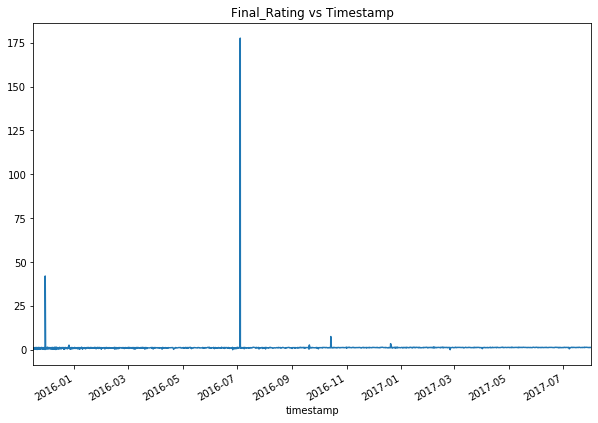

In [68]:
plt.figure(figsize = (10, 7))
final_clean.groupby('timestamp')['final_rating'].mean().plot(kind='line')
plt.title('Final_Rating vs Timestamp');

#### From the above plot we can depict that there are sharp rises at particular date and timeperiod which even crosses the value 100.

### Relationship between retweet_count', 'favorite_count', 'final_rating', 'rating_numerator' and 'rating_denominator'.

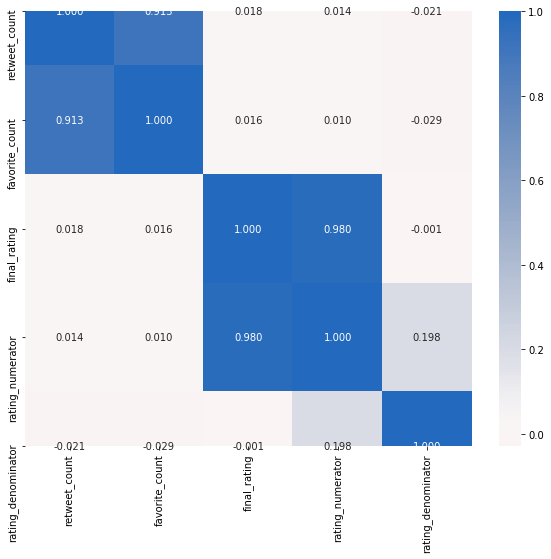

In [69]:
numeric_vars_1 = ['retweet_count','favorite_count', 'final_rating','rating_numerator','rating_denominator']
plt.figure(figsize = [10, 8])
sb.heatmap(final_clean[numeric_vars_1].corr(), annot = True, fmt = '.3f',cmap ='vlag_r',center = 0)
plt.show()

#### From the visualization of Heatmap we can observe that favorite count and final_rating are very weakly related.Though Favorite count and Retweet count are highly positively correlated.Further, we can see final_rating is positively related to rating numerator.

### What relationship is there between Dog stages and Favorite count?

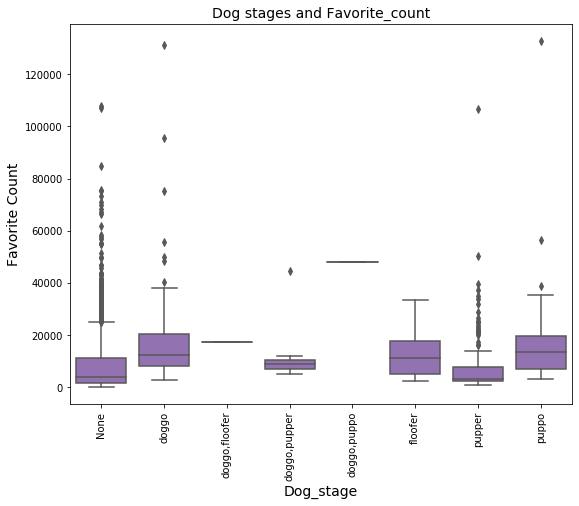

In [70]:
base_color = sb.color_palette()[4]
plt.figure(figsize=(9,7))
g = sb.boxplot(data = final_clean, x='dog_stage',y='favorite_count',color= base_color)
g.axes.set_title('Dog stages and Favorite_count', fontsize=14)
plt.xticks(rotation=90)
plt.xlabel('Dog_stage', fontsize = 14)
plt.ylabel('Favorite Count', fontsize = 14)
plt.show();


#### From the box plot we can predict that doggo, floofer and puppo categories got the maximum favorite count followed by pupper category of dog stage.

### What is the relationship between Dog stages and Retweet Count?

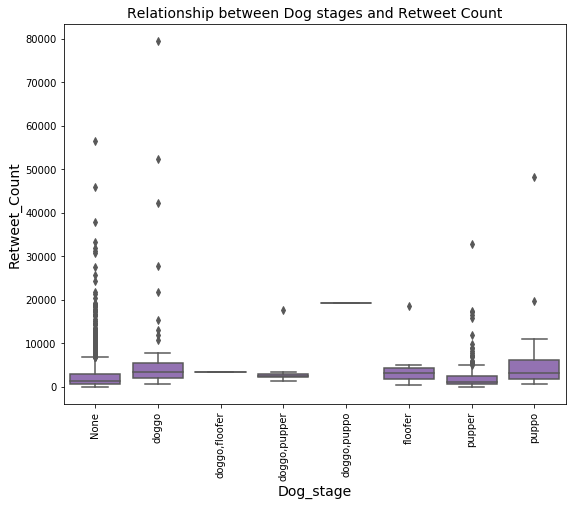

In [71]:
plt.figure(figsize=(9,7))
g = sb.boxplot(data = final_clean, x='dog_stage',y='retweet_count',color= base_color)
g.axes.set_title('Relationship between Dog stages and Retweet Count', fontsize=14)
plt.xticks(rotation=90)
plt.xlabel('Dog_stage', fontsize = 14)
plt.ylabel('Retweet_Count', fontsize = 14);


#### The above plot shows that most dogs are in 'Puppo' category but highest retweeted about 'doggo' stage following that belongs to 'Pupper'category.

### Plotting between favorite count and retweet count.

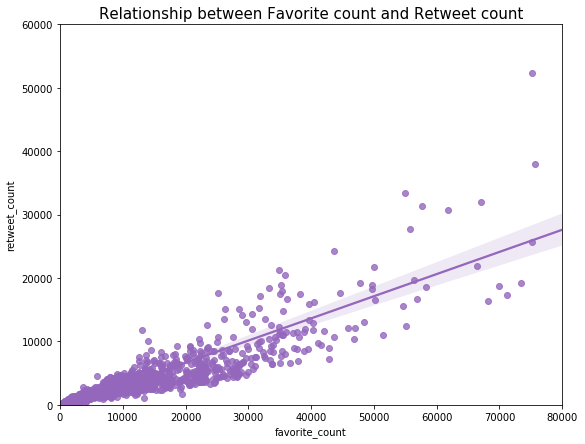

In [72]:
base_color = sb.color_palette()[4]
plt.figure(figsize=(9,7))
sb.regplot(data = final_clean, x ='favorite_count', y='retweet_count',color = base_color)
plt.xlim(0,80000)
plt.ylim(0,60000)
plt.title('Relationship between Favorite count and Retweet count' , fontsize =15);

#### From the visualization and limiting the values we can see that there is a strong relationship between both the values.We can also say that if a person is retweeting the tweet than it is liked also many time.

### Which Dog stage is more popular among dog lovers?

In [73]:
m = final_clean.dog_stage.value_counts()

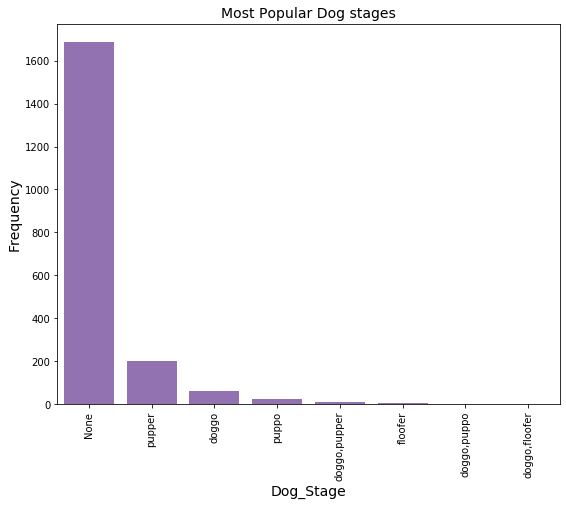

In [74]:
plt.figure(figsize=(9,7))
sb.countplot(data = final_clean, x = 'dog_stage', color = base_color, order = m.index);
plt.xticks(rotation = 90)
plt.title('Most Popular Dog stages', fontsize= 14)
plt.xlabel('Dog_Stage', fontsize = 14)
plt.ylabel('Frequency', fontsize =14);

#### Interestingly, we can see that maximum people prefer Pupper followed by Doggo category and least preferred are the doggo-puppo and doggo-floofer categories of Dog Stages.

### What is the popular dog name values?

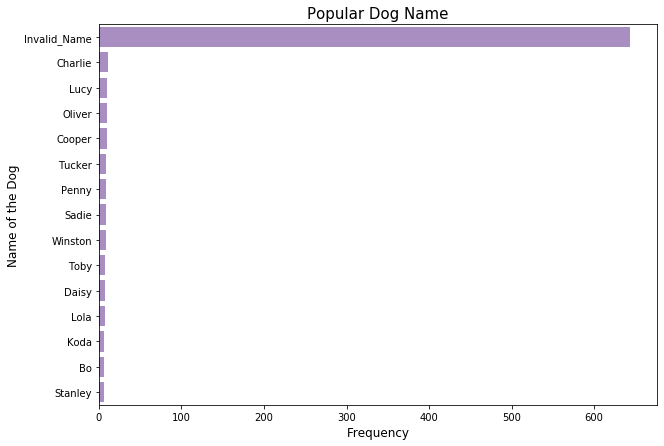

In [75]:
count = final_clean['name'].value_counts().head(15)
plt.figure(figsize=(10,7))
graph = sb.barplot(y=count.index, x=count.values, alpha=0.8, color = base_color)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Name of the Dog', fontsize=12)
plt.title('Popular Dog Name', fontsize=15)
plt.show()
fig = graph.get_figure()
fig.savefig('popular_dog.png')


#### Maximum dog names are invalid names still followed by the name 'Charlie','Oliver' and 'Lucy'